In [ ]:
# Mosaic images
#!pip install rasterio

"""
note - this cell, seems to get stuck and take a looong time to run - even if doing a subset of the images (one folder of pre images) 
Sometimes this cell gives an error - maybe because the file is too large? I haven't been able to produce an output image yet.
One folder of pre imagery is approx. 2.1 GB x 13 folders

# Reference: https://medium.com/spatial-data-science/how-to-mosaic-merge-raster-data-in-python-fb18e44f3c8
"""

# import the rasterio libraries and create the output folder with Python path lib
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
path = Path('Pre-event-v2') # path to the pre-event directory
Path('test_output').mkdir(parents=True, exist_ok=True) # create a directory to 'output' folder, make the 'output' folder if it doesn't already exist
output_path = 'test_output/test_mosaic_output.tif' # Specify the path and name for the output mosaic

# Iterate over available raster files
raster_files = list(path.iterdir())
# Create an empty list to hold the raster files within
raster_to_mosiac = []

# loop through raster files, open them with rasterio and append them to the raster_to_mosiac list we created above. 
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)
    
# Use the merge() method from rasterio to create the mosaic. We also create the output transformation parameters to use later.
mosaic, output = merge(raster_to_mosiac)

# Now, we copy the raster's metadata and update it to match the height and width of the mosaic.
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

# In this final stage, we write the mosaiced file in a local folder.
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)

In [1]:
# Mosaic images
#!pip install rasterio

"""
note - this cell is a test on one folder of pre imagery - it works.
This one image is 2.1 GB

# Reference: https://medium.com/spatial-data-science/how-to-mosaic-merge-raster-data-in-python-fb18e44f3c8
"""

# import the rasterio libraries and create the output folder with Python path lib
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path
path = Path('Pre/10300100D5947C00') # path to the pre-event directory
Path('test_output').mkdir(parents=True, exist_ok=True) # create a directory to 'output' folder, make the 'output' folder if it doesn't already exist
output_path = 'test_output/10300100D5947C00_mosaic.tif' # Specify the path and name for the output mosaic

# Iterate over available raster files
raster_files = list(path.iterdir())
# Create an empty list to hold the raster files within
raster_to_mosiac = []

# loop through raster files, open them with rasterio and append them to the raster_to_mosiac list we created above. 
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)
    
# Use the merge() method from rasterio to create the mosaic. We also create the output transformation parameters to use later.
mosaic, output = merge(raster_to_mosiac)

# Now, we copy the raster's metadata and update it to match the height and width of the mosaic.
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

# In this final stage, we write the mosaiced file in a local folder.
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)

In [ ]:
# # Can we visualise to make sure it worked?

# Reference: ChatGPT3.5 generated this code. This was done on 20/09/2023 with the following prompts: "can you write me python code to visualise a tif image"

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Replace 'your_image.tif' with the path to your GeoTIFF image file
image_path = 'test_output/10300100D5947C00_mosaic.tif'

# Open the GeoTIFF image using rasterio
with rasterio.open(image_path) as src:
    # Read the image as a numpy array
    image = src.read()

# Plot the image using matplotlib
plt.figure(figsize=(8, 8))
show(image, cmap='viridis')  # You can change the colormap as needed
plt.title('GeoTIFF Image')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

# This did work but it's slightly oddly laid out lol

In [ ]:
# Trying gdal - apparently it works better for mosaics of larger files

# Go to terminal and run this line (then enter y):
# conda install -c conda-forge gdal

#gdal api

"""

GDAL Warp on VRT file using outline of post-imagery to clip the VRT file. Then tile the VRT file, then translate to tiff, then change dectection. 

https://courses.spatialthoughts.com/gdal-tools.html#compressing-output

Section 1.3


"""



In [ ]:
from osgeo import gdal
import glob

# mosaic_data = glob.glob('Pre/10300100D5947C00/*.tif')
# print(mosaic_data)

gdal.BuildVRT("test_out_VRT.vrt", glob.glob('Pre-event-v/*.tif'))
# gdal.Translate('Mosaic_vrt.tif','out_VRT.vrt',format='gtiff')
#!gdal_translate test_out_VRT.vrt test_out.tif -co TILED=YES -co COPY_SRC_OVERVIEWS=YES -co COMPRESS=DEFLATE -co BIGTIFF=YES
# https://gis.stackexchange.com/questions/143693/cutting-a-shape-from-a-vrt-file-with-gdal-warp


In [ ]:
from osgeo import gdal
import glob

gdal.BuildVRT("out_VRT.vrt", glob.glob('Pre/10300100D5947C00/*.tif'))

input_file = 'out_VRT.vrt'
output_file = 'Mosaic_vrt.tif'

options = [
    "-of", "GTiff",
    "-co", "COMPRESS=DEFLATE",
    "-co", "PREDICTOR=2",
]

gdal.Translate(output_file, input_file, options=options)


START HERE

In [13]:
#Build Pre event mosaic
!gdalbuildvrt pre_vrt_v2.vrt Pre-event-v2/*.tif


0...10...20...30...40...50...60...70...80...90...100 - done.


In [14]:
#Build Post event mosaic
!gdalbuildvrt post_vrt_v2.vrt Post-event-v2/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [16]:
#info about each file
!gdalinfo post_vrt_v2.vrt
!gdalinfo pre_vrt_v2.vrt

Driver: VRT/Virtual Raster
Files: post_vrt_v2.vrt
       Post-event-v2/10300100ED11EA00_120202003120.tif
       Post-event-v2/10300100ED11EA00_120202003121.tif
       Post-event-v2/10300100ED11EA00_120202003122.tif
       Post-event-v2/10300100ED11EA00_120202003123.tif
       Post-event-v2/10300100ED11EA00_120202003130.tif
       Post-event-v2/10300100ED11EA00_120202003131.tif
       Post-event-v2/10300100ED11EA00_120202003132.tif
       Post-event-v2/10300100ED11EA00_120202003133.tif
       Post-event-v2/10300100ED11EA00_120202003300.tif
       Post-event-v2/10300100ED11EA00_120202003301.tif
       Post-event-v2/10300100ED11EA00_120202003302.tif
       Post-event-v2/10300100ED11EA00_120202003303.tif
       Post-event-v2/10300100ED11EA00_120202003310.tif
       Post-event-v2/10300100ED11EA00_120202003311.tif
       Post-event-v2/10300100ED11EA00_120202003312.tif
       Post-event-v2/10300100ED11EA00_120202003313.tif
       Post-event-v2/10300100ED11EA00_120202003320.tif
       Post-eve

In [18]:
!gdaltindex post_vrt_outline_v2.shp post_vrt_v2.vrt

Creating new index file...


In [19]:
# use shp outline to clip pre-vrt file
!gdalwarp -cutline post_vrt_outline_v2.shp -crop_to_cutline -of VRT pre_vrt_v2.vrt pre_vrt_clipped_v2.vrt


Creating output file that is 99328P x 82944L.
Processing pre_vrt_v2.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [20]:
# tile pre-vrt

!gdal_translate -co TILED=YES -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024 pre_vrt_clipped_v2.vrt pre_vrt_tiled_v2.tif


Input file size is 99328, 82944
0...10...20...30...40...50...60...70...80...90...100 - done.


In [21]:
# tile post-vrt

!gdal_translate -co TILED=YES -co BLOCKXSIZE=1024 -co BLOCKYSIZE=1024 post_vrt_v2.vrt post_vrt_tiled_v2.tif


Input file size is 99328, 82944
0...10...20...30...40...50...60...70...80...90...100 - done.


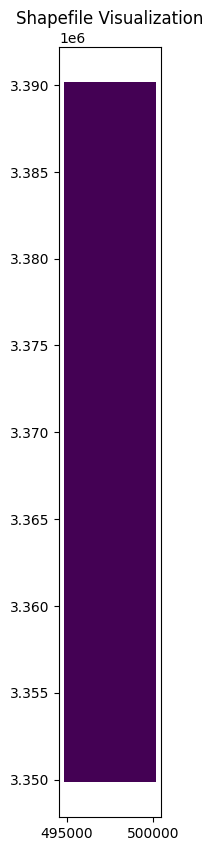

In [4]:
#Visualize Shapefiles

import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = 'post_vrt_outline_v2.shp'

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapefile data on the Matplotlib axis
gdf.plot(ax=ax, cmap='viridis')  # You can change the colormap as needed

# Add a title
plt.title('Shapefile Visualization')

# Display the plot
plt.show()


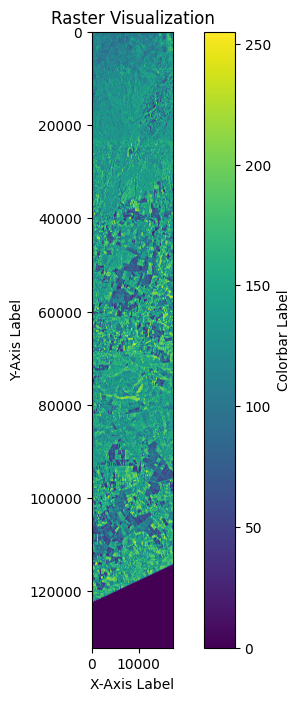

In [10]:
# Visualize Rasters

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('pre_vrt_tiled.tif') as src:
    raster_data = src.read(1)  # Read the first band (change the index as needed)

    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot



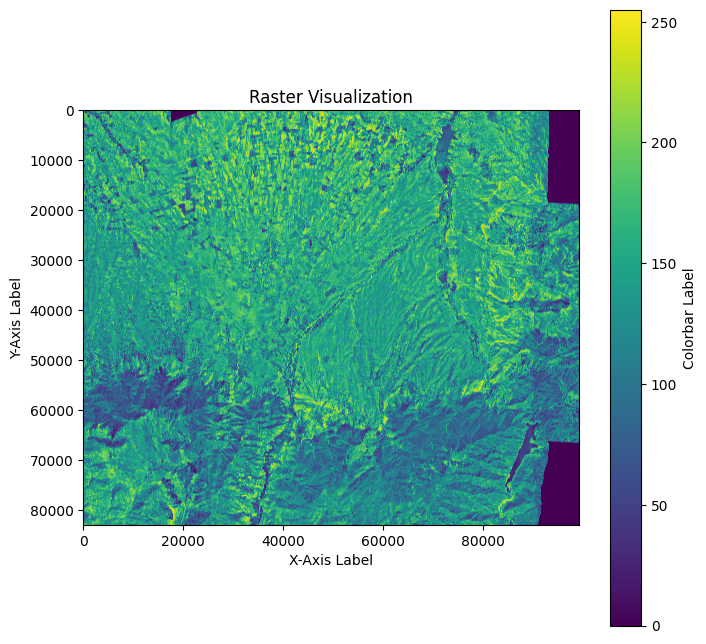

In [24]:
# Visualize Rasters

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('post_vrt_tiled_v2.tif') as src:
    raster_data = src.read(1)  # Read the first band (change the index as needed)

    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot



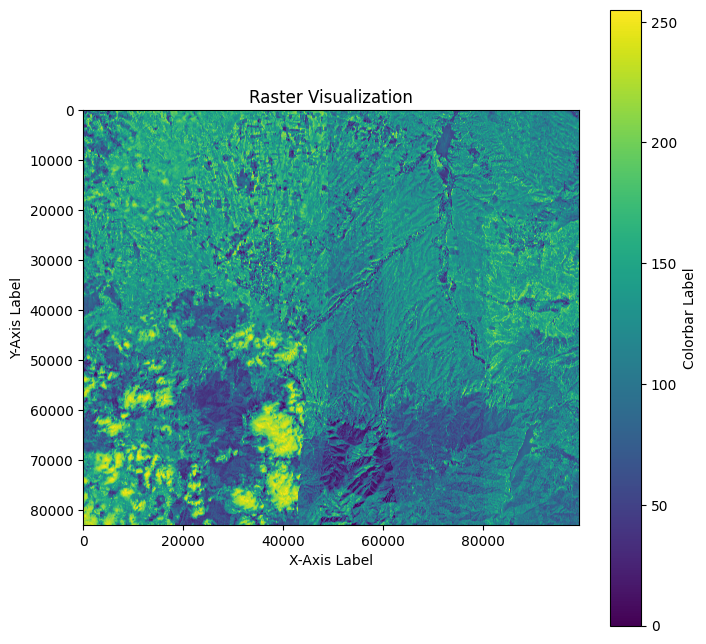

In [25]:
# Visualize Rasters

import matplotlib.pyplot as plt
import rasterio

with rasterio.open('pre_vrt_tiled_v2.tif') as src:
    raster_data = src.read(1)  # Read the first band (change the index as needed)

    plt.figure(figsize=(8, 8))  # Set the figure size as needed
plt.imshow(raster_data, cmap='viridis')  # Adjust the colormap ('cmap') as needed
plt.colorbar(label='Colorbar Label')  # Add a colorbar with a label
plt.title('Raster Visualization')  # Set the plot title
plt.xlabel('X-Axis Label')  # Set the X-axis label
plt.ylabel('Y-Axis Label')  # Set the Y-axis label
plt.show()  # Display the plot



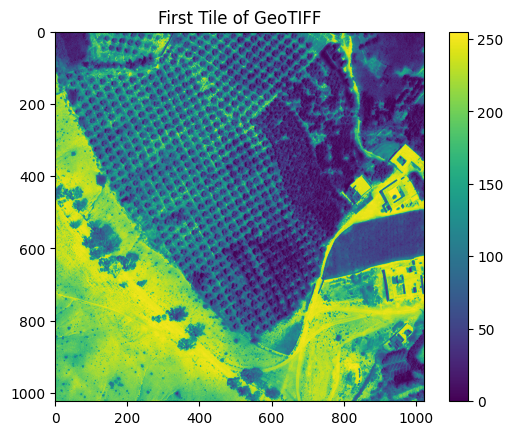

In [22]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('post_vrt_tiled_v2.tif') as src:
    # Read the first tile (index 0)
    tile = src.read(1, window=((0, src.block_shapes[0][0]), (0, src.block_shapes[1][0])))

    # Display the tile using matplotlib
    plt.imshow(tile, cmap='viridis')  # You can change the colormap as needed
    plt.title('First Tile of GeoTIFF')
    plt.colorbar()
    plt.show()


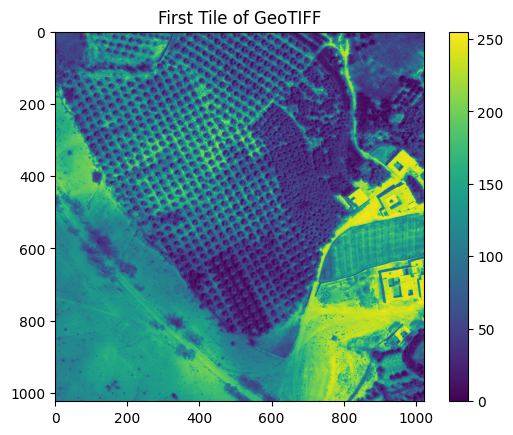

In [23]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('pre_vrt_tiled_v2.tif') as src:
    # Read the first tile (index 0)
    tile = src.read(1, window=((0, src.block_shapes[0][0]), (0, src.block_shapes[1][0])))

    # Display the tile using matplotlib
    plt.imshow(tile, cmap='viridis')  # You can change the colormap as needed
    plt.title('First Tile of GeoTIFF')
    plt.colorbar()
    plt.show()
